<h1><center><span style='color:Blue'>SUPERSTORE DATA ANALYSIS (SALES) </span><center/><h1/>

## OBJECTIVE

- What is the overall sales trend?
- Which are the Top 10 products by sales?
- Which are the Top 10 customers by sales?
- Which are the Most Selling Products?
- Which are the Top 10 customers by profit?
- Which are the top 10 product by profit percentage?
- Which is the most preferred Ship Mode?
- Which region has highest sales?
- Which top 10 State has highest sales?
- Which are the Most Profitable Category and Sub-Category?

### Importing Libraries

In [43]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Importing Dataset

In [44]:
superstore_path = '/Users/nitintomar/Documents/Superstore.csv'

In [45]:
Superstore = pd.read_csv(superstore_path)

### Data Audit

In [46]:
# First five rows from the dataset.
Superstore.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2017-152156,08/11/17,11/11/17,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2017-152156,08/11/17,11/11/17,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2017-138688,12/06/17,16/06/17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2016-108966,11/10/16,18/10/16,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2016-108966,11/10/16,18/10/16,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [47]:
# Shape of the dataset.
Superstore.shape

(9994, 21)

In [48]:
# Columns of the dataset
Superstore.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [49]:
# Data type information of the dataset
Superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9983 non-null   float64
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [50]:
# Descriptive summary of the dataset
Superstore.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9983.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55245.233297,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32038.715955,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,57103.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


### Clean up the data!
The first step in this is figuring out what we need to clean. I have found in practice, that you find things you need to clean as you perform operations and get errors. Based on the error, you decide how you should go about cleaning the data

In [51]:
# Checking missing values
Superstore.isna().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
dtype: int64

Here we can see that Postal code showing 11 null records in the dataset but as postal code not require for analysis so we can drop that column from the dataset

In [52]:
# Dropping the column "Postal Code" from the dataset
Superstore.drop("Postal Code", axis = 1, inplace = True)

In [53]:
# Checking dataset first rows after dropping column "Postal Code"
Superstore.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2017-152156,08/11/17,11/11/17,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136


### Exploratory Data Analysis as per objective

As we need to work on date so now we'll add new column "year" in the dataset to derive year from Order Date.

In [54]:
# Add Year & Month column in the dataset
Superstore['Year'] = pd.to_datetime(Superstore['Order Date']).dt.year
Superstore['Month'] = pd.to_datetime(Superstore['Order Date']).dt.month
Superstore.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year,Month
0,1,CA-2017-152156,08/11/17,11/11/17,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,2017,8


In [55]:
#Add new column "Total Sales" by multiplying Quantity of product to sales.
Superstore['Total Sales'] = Superstore['Quantity'].astype('int') * Superstore['Sales'].astype('float')
Superstore.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year,Month,Total Sales
0,1,CA-2017-152156,08/11/17,11/11/17,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,2017,8,523.92


<h6><span style='color:Purple'>1. What is the overall sales trend?</span><h6/>

In [56]:
# grouping Year by sales
Superstore_Sales_Year = Superstore.groupby('Year').sum()['Total Sales'].round(2).reset_index()
Superstore_Sales_Year

,Year,Total Sales
0,2015,2468283.73
1,2016,2384901.38
2,2017,3050057.36
3,2018,3584819.60


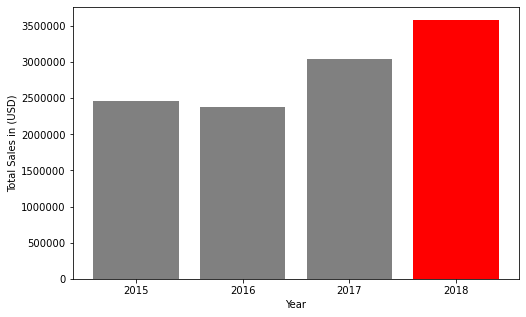

In [57]:
# Plot the bar to show overall sales trend
plt.figure(figsize=(8, 5))
max_values = Superstore_Sales_Year["Total Sales"]
clrs = ['grey' if (x < max(max_values)) else 'red' for x in max_values ]
ax = plt.subplot(111)
ax.bar(Superstore_Sales_Year["Year"], Superstore_Sales_Year["Total Sales"],color=clrs)
plt.xlabel("Year")
plt.ylabel("Total Sales in (USD)")
ax.ticklabel_format(axis="y",style = "plain",useOffset=False)
ax.set_xticks([2015, 2016, 2017, 2018])
plt.show()

In above bar chart you can see that red highlighted bar is the maximum total sales in year 2018

In [58]:
# Grouping month by total sales
Superstore_Sales_Month = Superstore.groupby('Month').sum()['Total Sales'].round(2).reset_index()
# sorting total sales 
Superstore_Sales_Month.sort_values(by=['Total Sales'], inplace=True, ascending=False)
Superstore_Sales_Month

,Month,Total Sales
10,11,1373834.59
11,12,1351901.15
8,9,1204265.55
7,8,1151978.62
2,3,1066093.24
9,10,888887.61
0,1,852350.82
4,5,848372.25
6,7,746280.81
3,4,688680.80


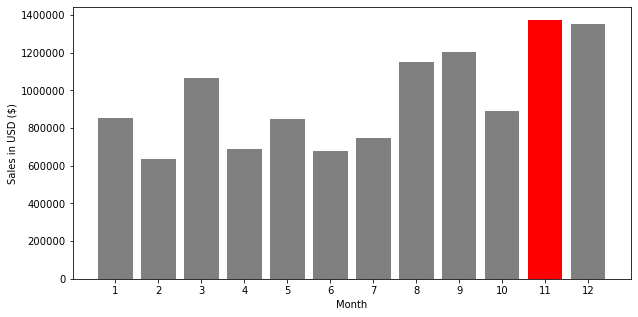

In [59]:
months = range(1,13)
plt.figure(figsize=(10, 5))
max_values = Superstore_Sales_Month["Total Sales"]
clrs = ['grey' if (x < max(max_values)) else 'red' for x in max_values ]
plt.bar(Superstore_Sales_Month["Month"], Superstore_Sales_Month["Total Sales"],color = clrs)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month')
plt.xticks(months)
plt.ticklabel_format(axis="y",style = "plain",useOffset=False)
plt.show()

In [60]:
# Add new column year-month 
Superstore['Year_Month'] = Superstore['Year'].map(str) + '-' + Superstore['Month'].map(str) 

In [61]:
Superstore.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year,Month,Total Sales,Year_Month
0,1,CA-2017-152156,08/11/17,11/11/17,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,2017,8,523.92,2017-8


In [62]:
# Grouping year-month by total sales
Superstore_Sales_Total = Superstore.groupby('Year_Month').sum()['Total Sales'].round(2).reset_index()

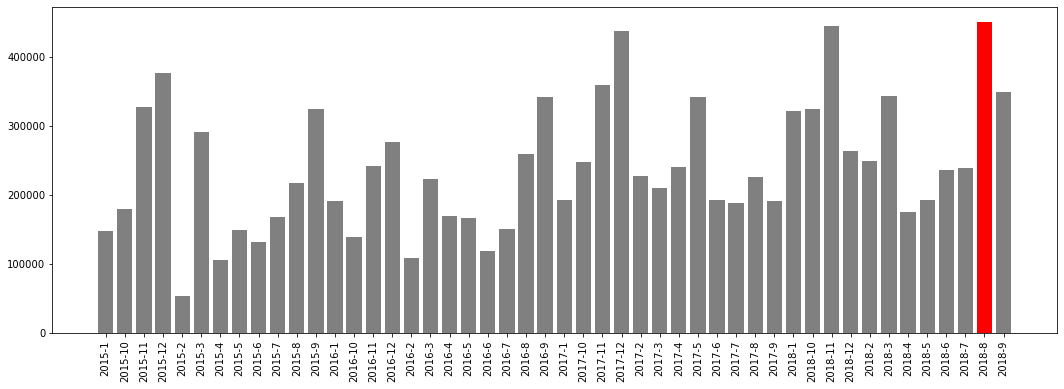

In [63]:
# Setting the figure size
max_values = Superstore_Sales_Total["Total Sales"]
clrs = ['grey' if (x < max(max_values)) else 'red' for x in max_values ]
plt.figure(figsize=(18, 6))
plt.bar(Superstore_Sales_Total['Year_Month'], Superstore_Sales_Total['Total Sales'] ,color=clrs)
plt.xticks(rotation='vertical', size=10)
plt.show()

<h6><span style='color:Purple'>2. Which are the Top 10 products by sales?</span><h6/>

In [64]:
# Grouping products by sales
product_sales = pd.DataFrame(Superstore.groupby('Product Name').sum()['Total Sales'])

# Sorting the dataframe in descending order
product_sales.sort_values(by=['Total Sales'], inplace=True, ascending=False)

# Top 10 products by sales
product_sales[:10]

,Total Sales
Product Name,
Canon imageCLASS 2200 Advanced Copier,253399.2760
GBC Ibimaster 500 Manual ProClick Binding System,171524.8920
Cisco TelePresence System EX90 Videoconferencing Unit,135830.8800
HON 5400 Series Task Chairs for Big and Tall,124494.0480
Samsung Galaxy Mega 6.3,118101.1880
Hewlett Packard LaserJet 3310 Copier,111478.1420
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,100662.4080
Lexmark MX611dhe Monochrome Laser Printer,93329.4510
"3D Systems Cube Printer, 2nd Generation, Magenta",84499.3500


<h6><span style='color:Purple'>3. Which are the Top 10 customers by sales?</span><h6/>

In [65]:
Superstore_customer = Superstore.groupby(["Customer Name"])['Total Sales'].aggregate(np.sum).reset_index().sort_values('Total Sales',ascending = False).head(10)
Superstore_customer

,Customer Name,Total Sales
686,Sean Miller,146749.7700
6,Adrian Barton,143857.7090
730,Tamara Chand,92602.5740
75,Becky Martin,88175.2660
397,Joseph Holt,80520.0420
441,Ken Lonsdale,74912.3130
312,Greg Tran,73016.0520
486,Maria Etezadi,71594.2960
90,Bill Shonely,71586.3310
588,Patrick O'Brill,69297.4106


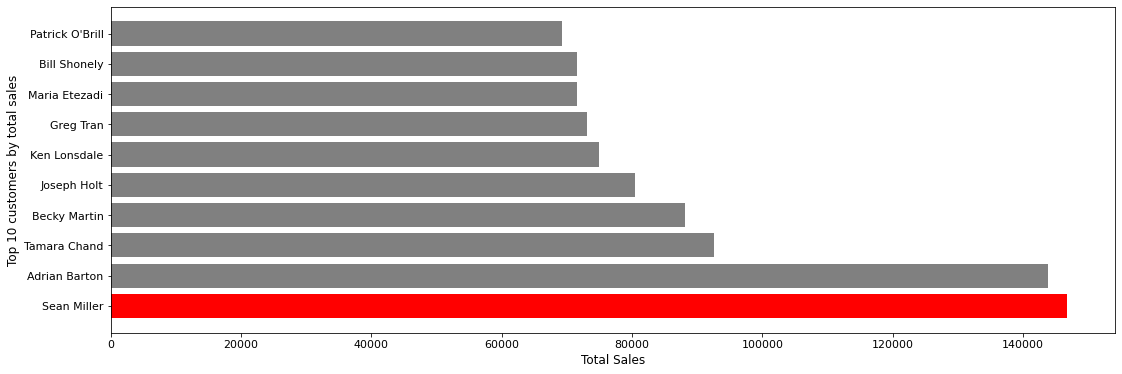

In [66]:
# Setting the figure size
max_values = Superstore_customer["Total Sales"]
clrs = ['grey' if (x < max(max_values)) else 'red' for x in max_values ]
plt.figure(figsize=(18, 6))
plt.barh(Superstore_customer["Customer Name"], Superstore_customer['Total Sales'],color=clrs,)
plt.xlabel("Total Sales", size=12)
plt.ylabel("Top 10 customers by total sales", size=12)
plt.xticks(rotation='horizontal', size=11)
plt.yticks(rotation='horizontal', size=11)
plt.show()

<h6><span style='color:Purple'>4. Which are the Most Selling Products?</span><h6/>

In [67]:
superstore_product = pd.DataFrame(Superstore.groupby(["Product Name"])['Quantity'].aggregate(np.sum).reset_index().sort_values('Quantity',ascending = False)).head(10)
superstore_product

,Product Name,Quantity
1499,Staples,215
1493,Staple envelope,170
537,Easy-staple paper,150
1500,Staples in misc. colors,86
942,KI Adjustable-Height Table,74
259,Avery Non-Stick Binders,71
1511,Storex Dura Pro Binders,71
699,GBC Premium Transparent Covers with Diagonal L...,67
1450,"Situations Contoured Folding Chairs, 4/Set",64
1497,Staple-based wall hangings,62


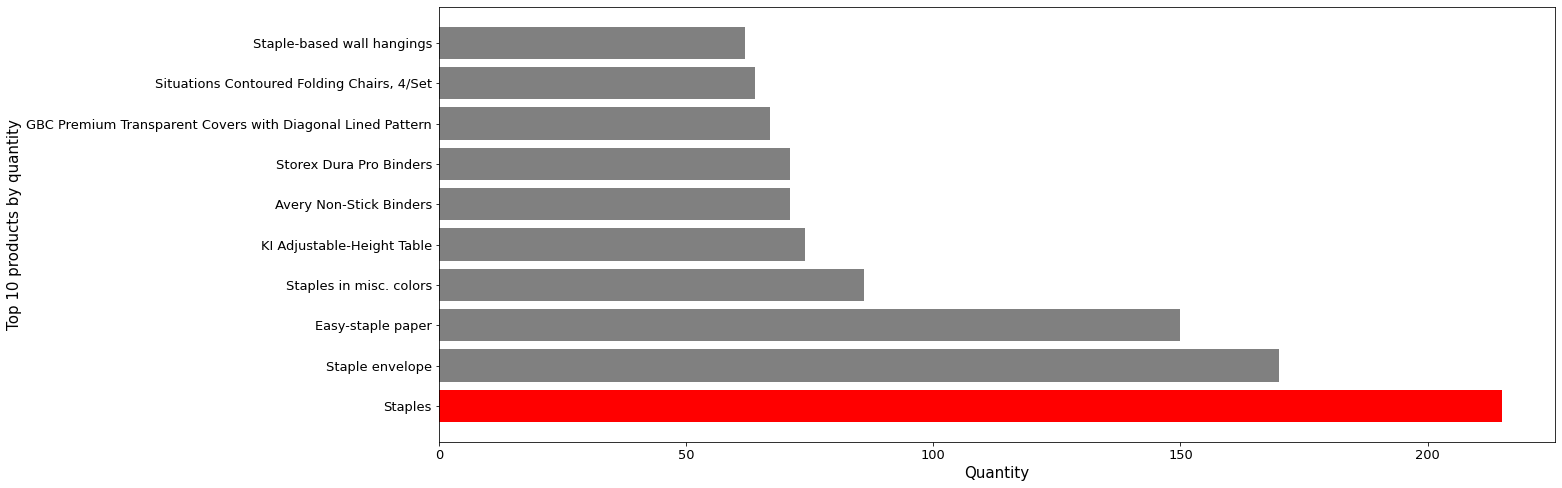

In [68]:
# Setting the figure size
max_values = superstore_product["Quantity"]
clrs = ['grey' if (x < max(max_values)) else 'red' for x in max_values ]
plt.figure(figsize=(20, 8))
plt.barh(superstore_product["Product Name"], superstore_product['Quantity'],color=clrs,)
plt.xlabel("Quantity", size=15)
plt.ylabel("Top 10 products by quantity", size=15)
plt.xticks(rotation='horizontal', size=13)
plt.yticks(rotation='horizontal', size=13)
plt.show()

<h6><span style='color:Purple'>5. Which are top 10 customers by profit?</span><h6/>

In [69]:
superstore_customer_profit = Superstore.sort_values(['Profit','Customer Name'],ascending = False).head(10)
superstore_customer_profit

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year,Month,Total Sales,Year_Month
6826,6827,CA-2017-118689,02/10/17,09/10/17,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,...,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.950,5,0.0,8399.9760,2017,2,87499.750,2017-2
8153,8154,CA-2018-140151,23/03/18,25/03/18,First Class,RB-19360,Raymond Buch,Consumer,United States,Seattle,...,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.960,4,0.0,6719.9808,2018,3,55999.840,2018-3
4190,4191,CA-2018-166709,17/11/18,22/11/18,Standard Class,HL-15040,Hunter Lopez,Consumer,United States,Newark,...,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.970,3,0.0,5039.9856,2018,11,31499.910,2018-11
9039,9040,CA-2017-117121,17/12/17,21/12/17,Standard Class,AB-10105,Adrian Barton,Consumer,United States,Detroit,...,Binders,GBC Ibimaster 500 Manual ProClick Binding System,9892.740,13,0.0,4946.3700,2017,12,128605.620,2017-12
4098,4099,CA-2015-116904,23/09/15,28/09/15,Standard Class,SC-20095,Sanjit Chand,Consumer,United States,Minneapolis,...,Binders,Ibico EPK-21 Electric Binding System,9449.950,5,0.0,4630.4755,2015,9,47249.750,2015-9
2623,2624,CA-2018-127180,22/10/18,24/10/18,First Class,TA-21385,Tom Ashbrook,Home Office,United States,New York City,...,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.968,4,0.2,3919.9888,2018,10,44799.872,2018-10
509,510,CA-2016-145352,16/03/16,22/03/16,Standard Class,CM-12385,Christopher Martinez,Consumer,United States,Atlanta,...,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,6354.950,5,0.0,3177.4750,2016,3,31774.750,2016-3
8488,8489,CA-2017-158841,02/02/17,04/02/17,Second Class,SE-20110,Sanjit Engle,Consumer,United States,Arlington,...,Machines,HP Designjet T520 Inkjet Large Format Printer ...,8749.950,5,0.0,2799.9840,2017,2,43749.750,2017-2
7666,7667,US-2017-140158,04/10/17,08/10/17,Standard Class,DR-12940,Daniel Raglin,Home Office,United States,Providence,...,Copiers,Hewlett Packard LaserJet 3310 Copier,5399.910,9,0.0,2591.9568,2017,4,48599.190,2017-4
6520,6521,CA-2018-138289,16/01/18,18/01/18,Second Class,AR-10540,Andy Reiter,Consumer,United States,Jackson,...,Binders,GBC DocuBind P400 Electric Binding System,5443.960,4,0.0,2504.2216,2018,1,21775.840,2018-1


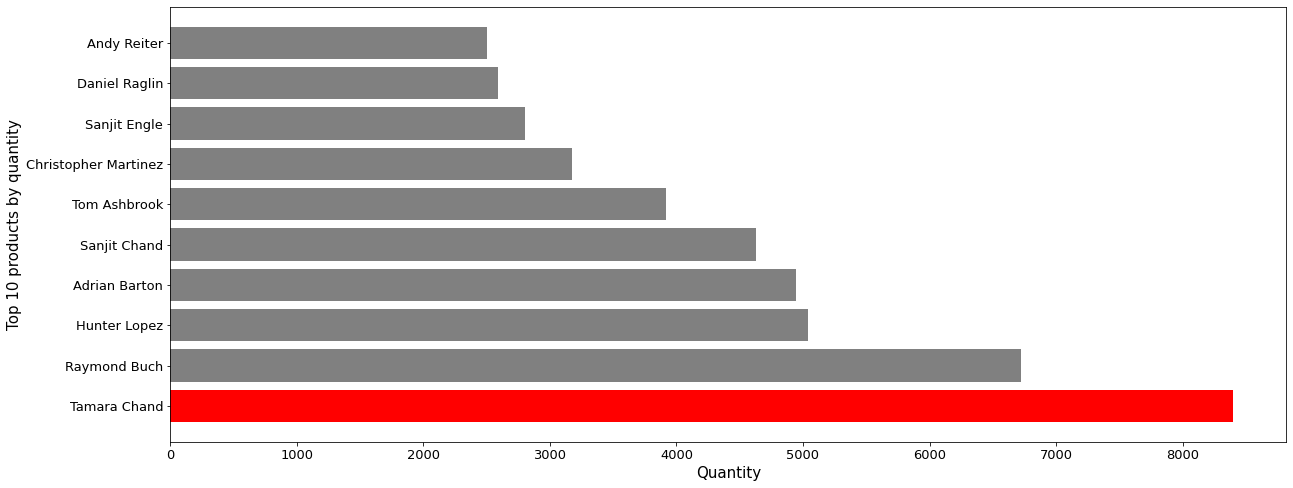

In [70]:
max_values = superstore_customer_profit["Profit"]
clrs = ['grey' if (x < max(max_values)) else 'red' for x in max_values ]
plt.figure(figsize=(20, 8))
plt.barh(superstore_customer_profit["Customer Name"], superstore_customer_profit['Profit'],color=clrs,)
plt.xlabel("Quantity", size=15)
plt.ylabel("Top 10 products by quantity", size=15)
plt.xticks(rotation='horizontal', size=13)
plt.yticks(rotation='horizontal', size=13)
plt.show()

<h6><span style='color:Purple'>6. Which are the top 10 product by profit percentage?</span><h6/>

In [71]:
Superstore['Cost Price'] = Superstore['Sales'].astype('float') - Superstore['Profit'].astype('float')
Superstore.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product Name,Sales,Quantity,Discount,Profit,Year,Month,Total Sales,Year_Month,Cost Price
0,1,CA-2017-152156,08/11/17,11/11/17,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,2017,8,523.92,2017-8,220.0464


In [72]:
Superstore['Profit %']=(Superstore['Profit']/Superstore['Cost Price'])*100

In [73]:
#Products with high Profit Percentage
superstore_top10profit = Superstore.sort_values(['Profit %','Product Name'],ascending=False).groupby('Profit %').head(10)
superstore_top10profit

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sales,Quantity,Discount,Profit,Year,Month,Total Sales,Year_Month,Cost Price,Profit %
1696,1697,CA-2016-156335,25/09/16,28/09/16,Second Class,PO-19195,Phillina Ober,Home Office,United States,Bayonne,...,104.980,2,0.0,52.4900,2016,9,209.960,2016-9,52.4900,100.000000
4611,4612,CA-2017-109407,24/01/17,26/01/17,Second Class,HG-14965,Henry Goldwyn,Corporate,United States,Gulfport,...,31.360,4,0.0,15.6800,2017,1,125.440,2017-1,15.6800,100.000000
3984,3985,CA-2017-135265,07/07/17,09/07/17,Second Class,CC-12370,Christopher Conant,Consumer,United States,Los Angeles,...,48.940,1,0.0,24.4700,2017,7,48.940,2017-7,24.4700,100.000000
4651,4652,CA-2018-150987,08/04/18,12/04/18,Standard Class,AH-10120,Adrian Hane,Home Office,United States,San Francisco,...,195.760,4,0.0,97.8800,2018,8,783.040,2018-8,97.8800,100.000000
6600,6601,CA-2015-154095,02/12/15,07/12/15,Standard Class,ON-18715,Odella Nelson,Corporate,United States,Clinton,...,146.820,3,0.0,73.4100,2015,2,440.460,2015-2,73.4100,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8916,8917,US-2017-144057,09/05/17,13/05/17,Standard Class,CV-12805,Cynthia Voltz,Corporate,United States,Austin,...,48.784,4,0.8,-131.7168,2017,9,195.136,2017-9,180.5008,-72.972973
8766,8767,CA-2016-107083,21/11/16,27/11/16,Standard Class,BB-11545,Brenda Bowman,Corporate,United States,Fort Worth,...,24.588,3,0.8,-67.6170,2016,11,73.764,2016-11,92.2050,-73.333333
9164,9165,CA-2016-164007,08/06/16,12/06/16,Standard Class,MG-17695,Maureen Gnade,Consumer,United States,Chicago,...,143.128,2,0.8,-393.6020,2016,8,286.256,2016-8,536.7300,-73.333333
676,677,US-2018-119438,18/03/18,23/03/18,Standard Class,CD-11980,Carol Darley,Consumer,United States,Tyler,...,2.688,3,0.8,-7.3920,2018,3,8.064,2018-3,10.0800,-73.333333


<h6><span style='color:Purple'>7. Which are the most preferred ship mode?</span><h6/>

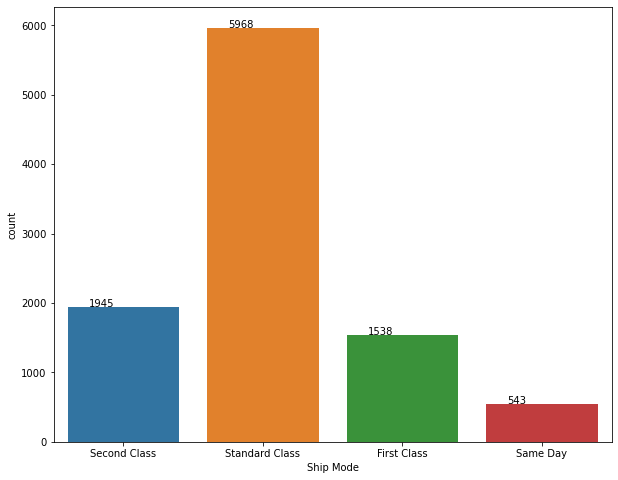

In [75]:
# Setting the figure size
plt.figure(figsize=(10, 8))
ax = plt.subplot(111)
# countplot: Show the counts of observations in each categorical bin using bars
sns.countplot(x='Ship Mode', data=Superstore)
for s in ax.patches:
    ax.annotate('{:.0f}'.format(s.get_height()), (s.get_x()+0.15, s.get_height()+1))

# Display the figure
plt.show()

<h6><span style='color:Purple'>8. Which region hzs highest sales?</span><h6/>

In [78]:
superstore_region = pd.DataFrame(Superstore.groupby(["Region"])['Total Sales'].aggregate(np.sum).reset_index().sort_values('Total Sales',ascending = False))
superstore_region

,Region,Total Sales
3,West,3.595228e+06
1,East,3.379326e+06
0,Central,2.475833e+06
2,South,2.037675e+06


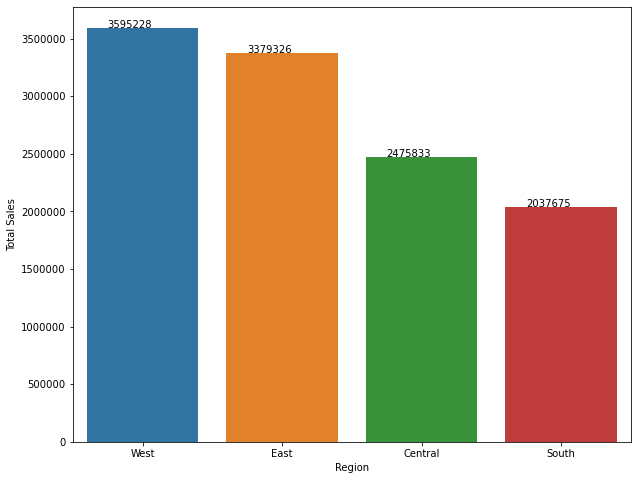

In [79]:
# Setting the figure size
plt.figure(figsize=(10, 8))
ax = plt.subplot(111)
# countplot: Show the counts of observations in each categorical bin using bars
sns.barplot(x='Region', y = 'Total Sales', data=superstore_region)
for s in ax.patches:
    ax.annotate('{:.0f}'.format(s.get_height()), (s.get_x()+0.15, s.get_height()+1))

# Display the figure
plt.ticklabel_format(axis="y",style = "plain",useOffset=False)
plt.show()

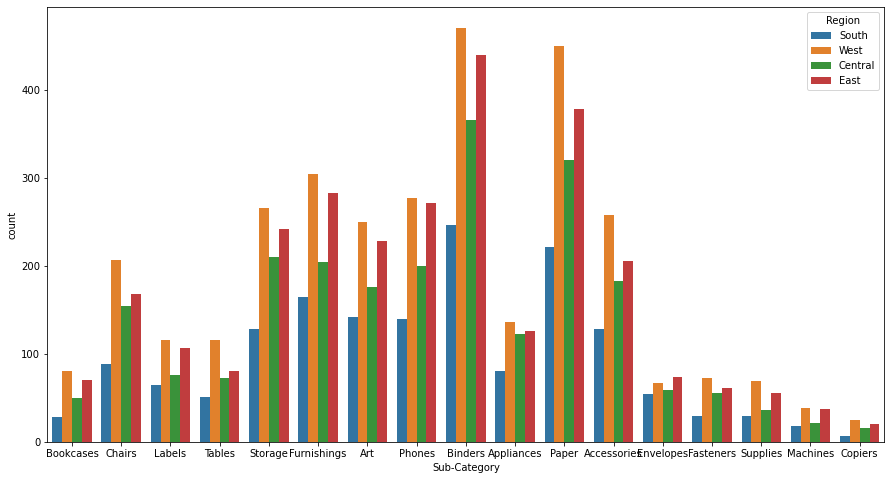

In [80]:
#Count of Sub-Category region wise
plt.figure(figsize=(15,8))
sns.countplot(x="Sub-Category", hue="Region", data=Superstore)
plt.show()

Binders has maximum sales from the west region

<h6><span style='color:Purple'>9. Which top 10 states has highest sales?</span><h6/>

In [81]:
superstore_state = pd.DataFrame(Superstore.groupby(["State"])['Total Sales'].aggregate(np.sum).reset_index().sort_values('Total Sales',ascending = False)).head(10)
superstore_state

,State,Total Sales
3,California,2.301218e+06
30,New York,1.561073e+06
41,Texas,8.340883e+05
45,Washington,6.923602e+05
36,Pennsylvania,6.021270e+05
8,Florida,4.720913e+05
20,Michigan,4.103509e+05
44,Virginia,3.764538e+05
11,Illinois,3.650843e+05
33,Ohio,3.625338e+05


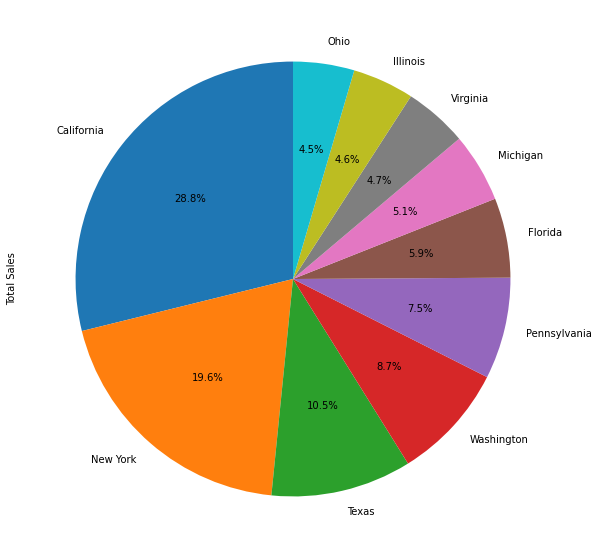

In [82]:
# Plot Pie chart for top 10 state as per total sales
PieLabels = superstore_state['State']
plt.figure(figsize=(12,10))
superstore_state['Total Sales'].plot.pie(autopct="%1.1f%%", labels = PieLabels, startangle = 90)

<h6><span style='color:Purple'>10. Which are the Most Profitable Category and Sub-Category?</span><h6/>

In [83]:
# Grouping products by Category and Sub-Category
cat_subcat = pd.DataFrame(Superstore.groupby(['Category', 'Sub-Category']).sum()['Profit'])

# Sorting the values
cat_subcat_profit = cat_subcat.sort_values(['Category','Profit'], ascending=False)
cat_subcat_profit

Profit
Category        Sub-Category            
Technology      Copiers       55617.8249
                Phones        44515.7306
                Accessories   41936.6357
                Machines       3384.7569
Office Supplies Paper         34053.5693
                Binders       30221.7633
                Storage       21278.8264
                Appliances    18138.0054
                Envelopes      6964.1767
                Art            6527.7870
                Labels         5546.2540
                Fasteners       949.5182
                Supplies      -1189.0995
Furniture       Chairs        26590.1663
                Furnishings   13059.1436
                Bookcases     -3472.5560
                Tables       -17725.4811

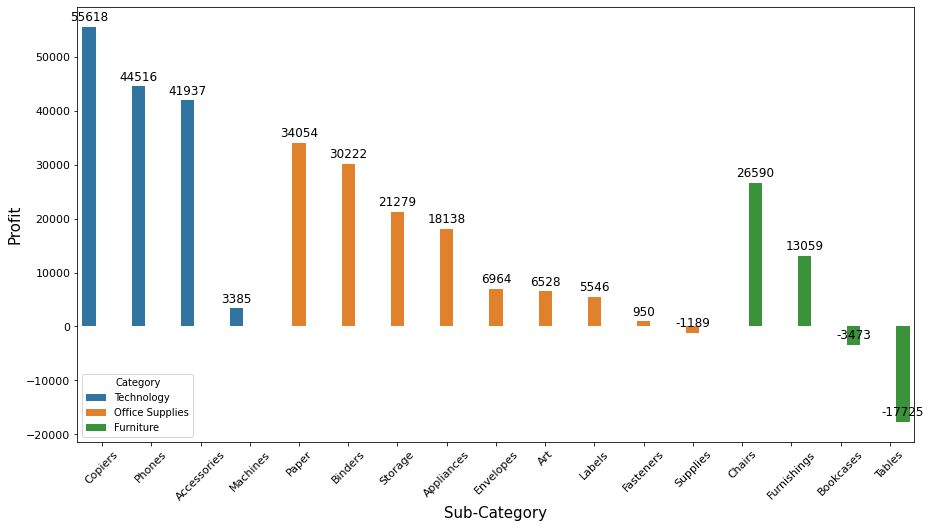

In [84]:
plt.figure(figsize=(15, 8))
splot=sns.barplot(x="Sub-Category", y="Profit", hue = "Category",data=cat_subcat_profit.reset_index())
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'bottom', 
                   size=12,
                   xytext = (0, 3), 
                   textcoords = 'offset points')
plt.xlabel("Sub-Category", size=15)
plt.ylabel("Profit", size=15)
plt.xticks(rotation=45, size=11)
plt.yticks(rotation='horizontal', size=11)
plt.show()

As you can see we are getting profit in sales by seeling copiers from technology, paper from office supplies and chairs from funiture even we have bookcases and tables has negative profit by selling from durniture category